<a href="https://colab.research.google.com/github/Nihcas1/customer_segmentation/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df  = pd.read_csv("/content/drive/MyDrive/ intern_tasks/Mall_Customers.csv")

In [ ]:
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.shape

(200, 5)

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#taking count of unique value in gende column
count_bygender=df['Genre'].value_counts().to_frame(name='count')
count_bygender

,count
Female,112
Male,88


<Axes: xlabel='Genre', ylabel='count'>

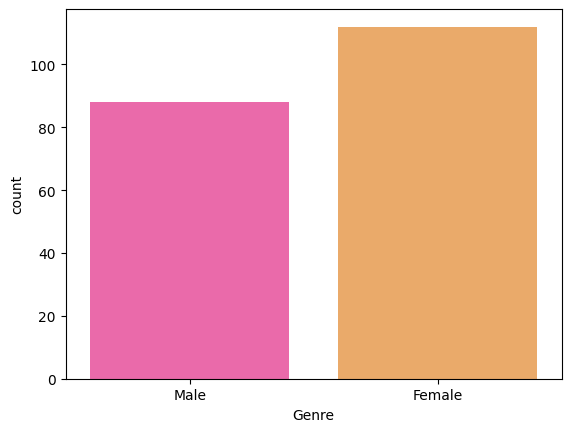

In [ ]:
#countplot
sns.countplot(x='Genre',data=df,palette='spring')

<Figure size 2000x1800 with 0 Axes>

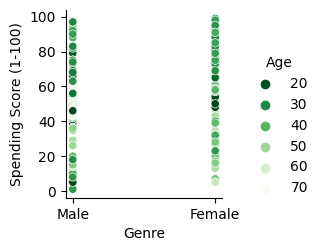

In [ ]:
#showing how the variables are scatterd
plt.figure(figsize=(20,18))
sns.pairplot(df,x_vars=['Genre'],y_vars=['Spending Score (1-100)'],kind='scatter',hue='Age',palette='Greens_r')

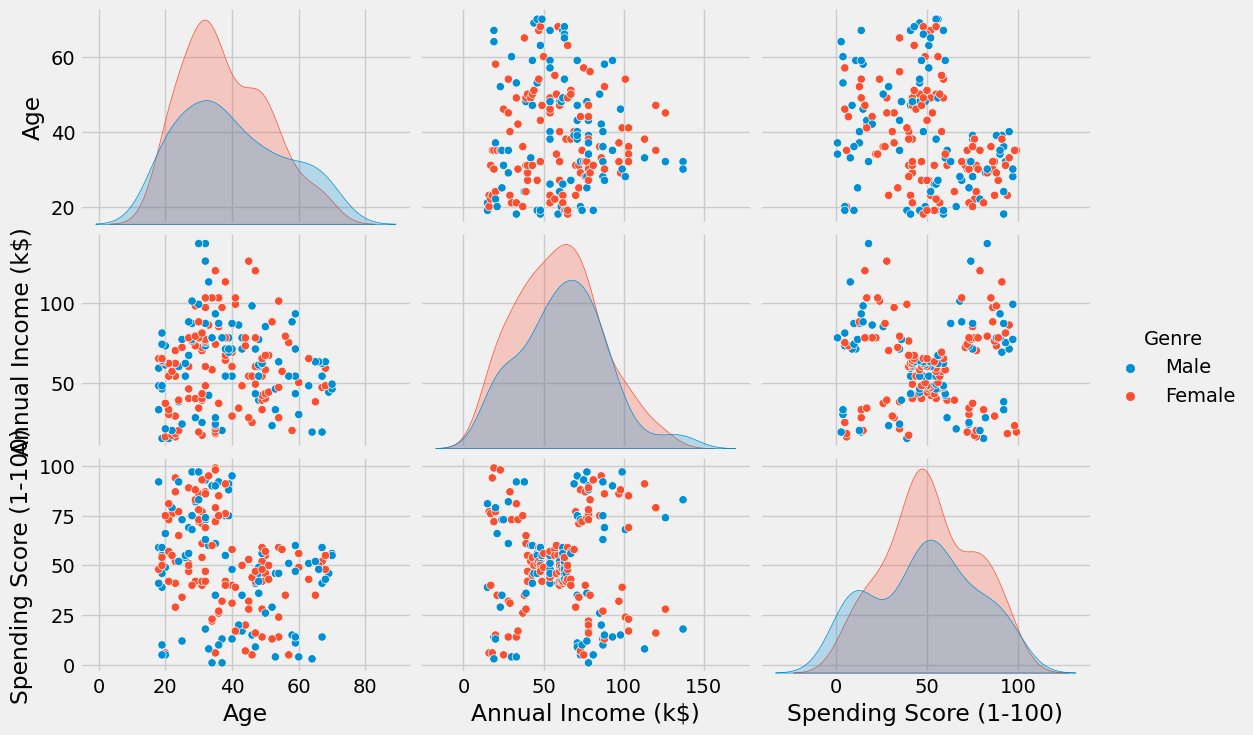

In [ ]:
plt.style.use('fivethirtyeight')
sns.pairplot(df.drop('CustomerID', axis=1), hue='Genre', aspect=1.5)
plt.show()

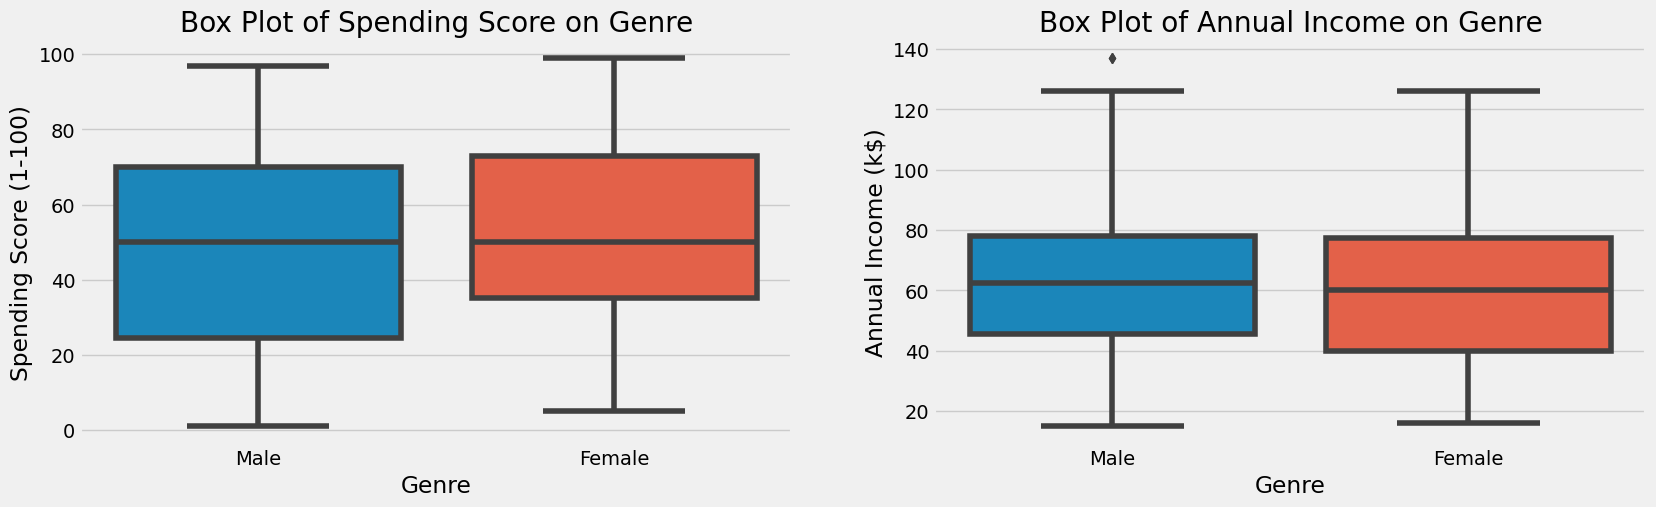

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))

plt.style.use('fivethirtyeight')
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df, ax = ax1)
ax1.set_title('Box Plot of Spending Score on Genre')

plt.style.use('fivethirtyeight')
sns.boxplot(x='Genre', y='Annual Income (k$)', data=df, ax = ax2)
ax2.set_title('Box Plot of Annual Income on Genre')
plt.show()

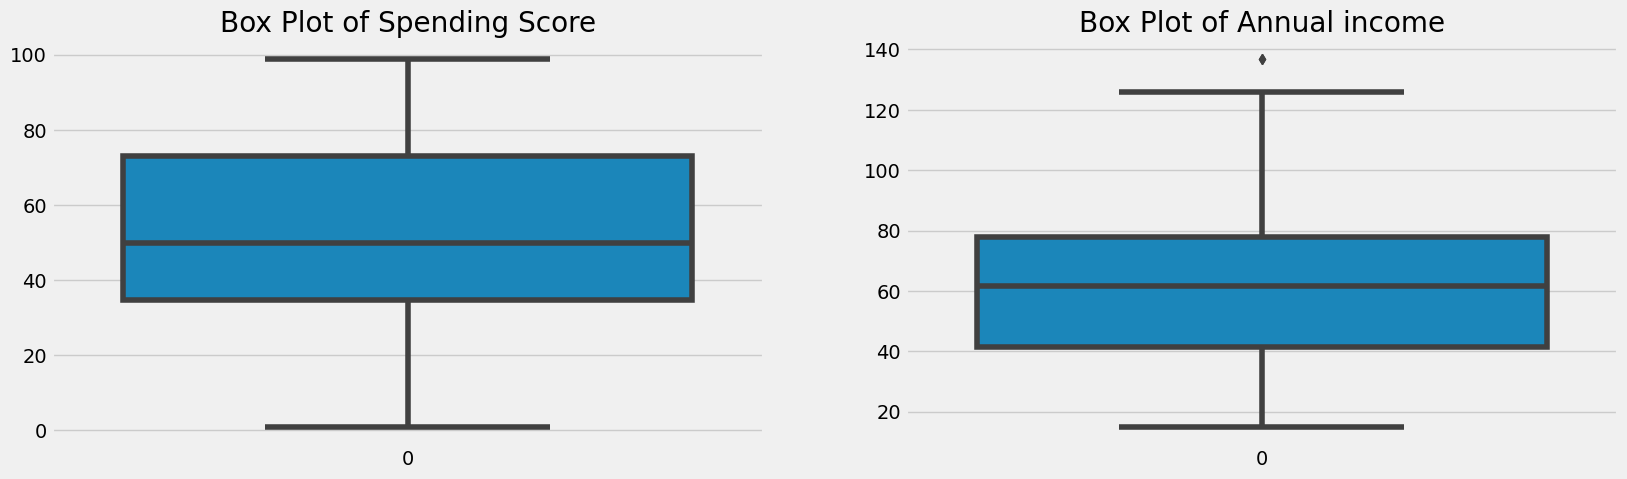

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))

plt.style.use('fivethirtyeight')
sns.boxplot(df['Spending Score (1-100)'], ax = ax1)
ax1.set_title('Box Plot of Spending Score')

plt.style.use('fivethirtyeight')
sns.boxplot(df['Annual Income (k$)'], ax = ax2)
ax2.set_title('Box Plot of Annual income')
plt.show()

In [ ]:
q1 = df['Annual Income (k$)'].quantile(0.25)
q3 = df['Annual Income (k$)'].quantile(0.75)

IQR = q3-q1

print("Quartile Measurements")
print("1st Quartile: {} \n3rd Quartile: {} \nInter Quartile Range: {} \n".format(q1, q3, IQR))

upper_limit = q3 + (1.5 * IQR)
lower_limit = q1 - (1.5 * IQR)

print("Limits based on IQR Rule (Multiply IQR by 1.5, the constant used to detect outliers)")
print("Upper Limit: {} \nLower Limit: {} \n".format(upper_limit, lower_limit))

new_dataset = df.loc[(df['Annual Income (k$)'] <upper_limit) & (df['Annual Income (k$)'] > lower_limit)]
print('Total Outliers Removed: ',len(df)- len(new_dataset))


Quartile Measurements
1st Quartile: 41.5 
3rd Quartile: 78.0 
Inter Quartile Range: 36.5 

Limits based on IQR Rule (Multiply IQR by 1.5, the constant used to detect outliers)
Upper Limit: 132.75 
Lower Limit: -13.25 

Total Outliers Removed:  2


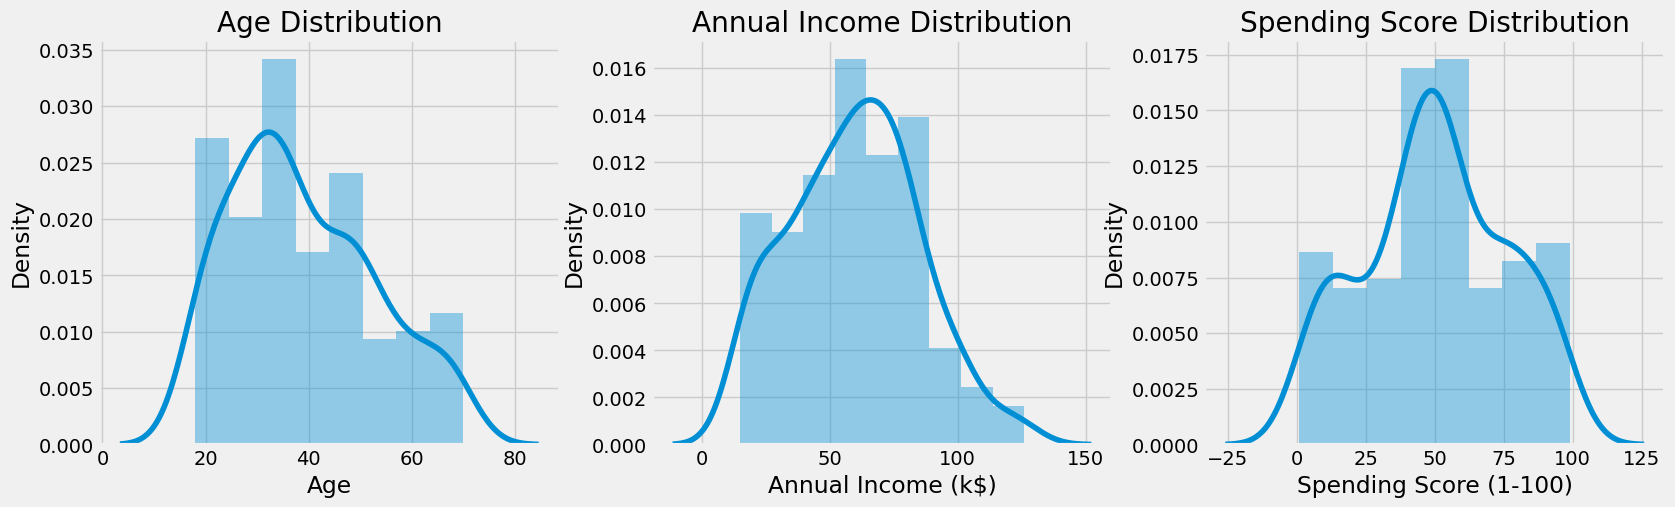

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,5))

plt.style.use('fivethirtyeight')
#sns.set(style="fivethirtyeight")

sns.distplot(new_dataset["Age"], ax = ax1)
ax1.set_title('Age Distribution')

sns.distplot(new_dataset["Annual Income (k$)"], ax = ax2)
ax2.set_title('Annual Income Distribution')

sns.distplot(new_dataset["Spending Score (1-100)"], ax = ax3)
ax3.set_title('Spending Score Distribution')

plt.show()